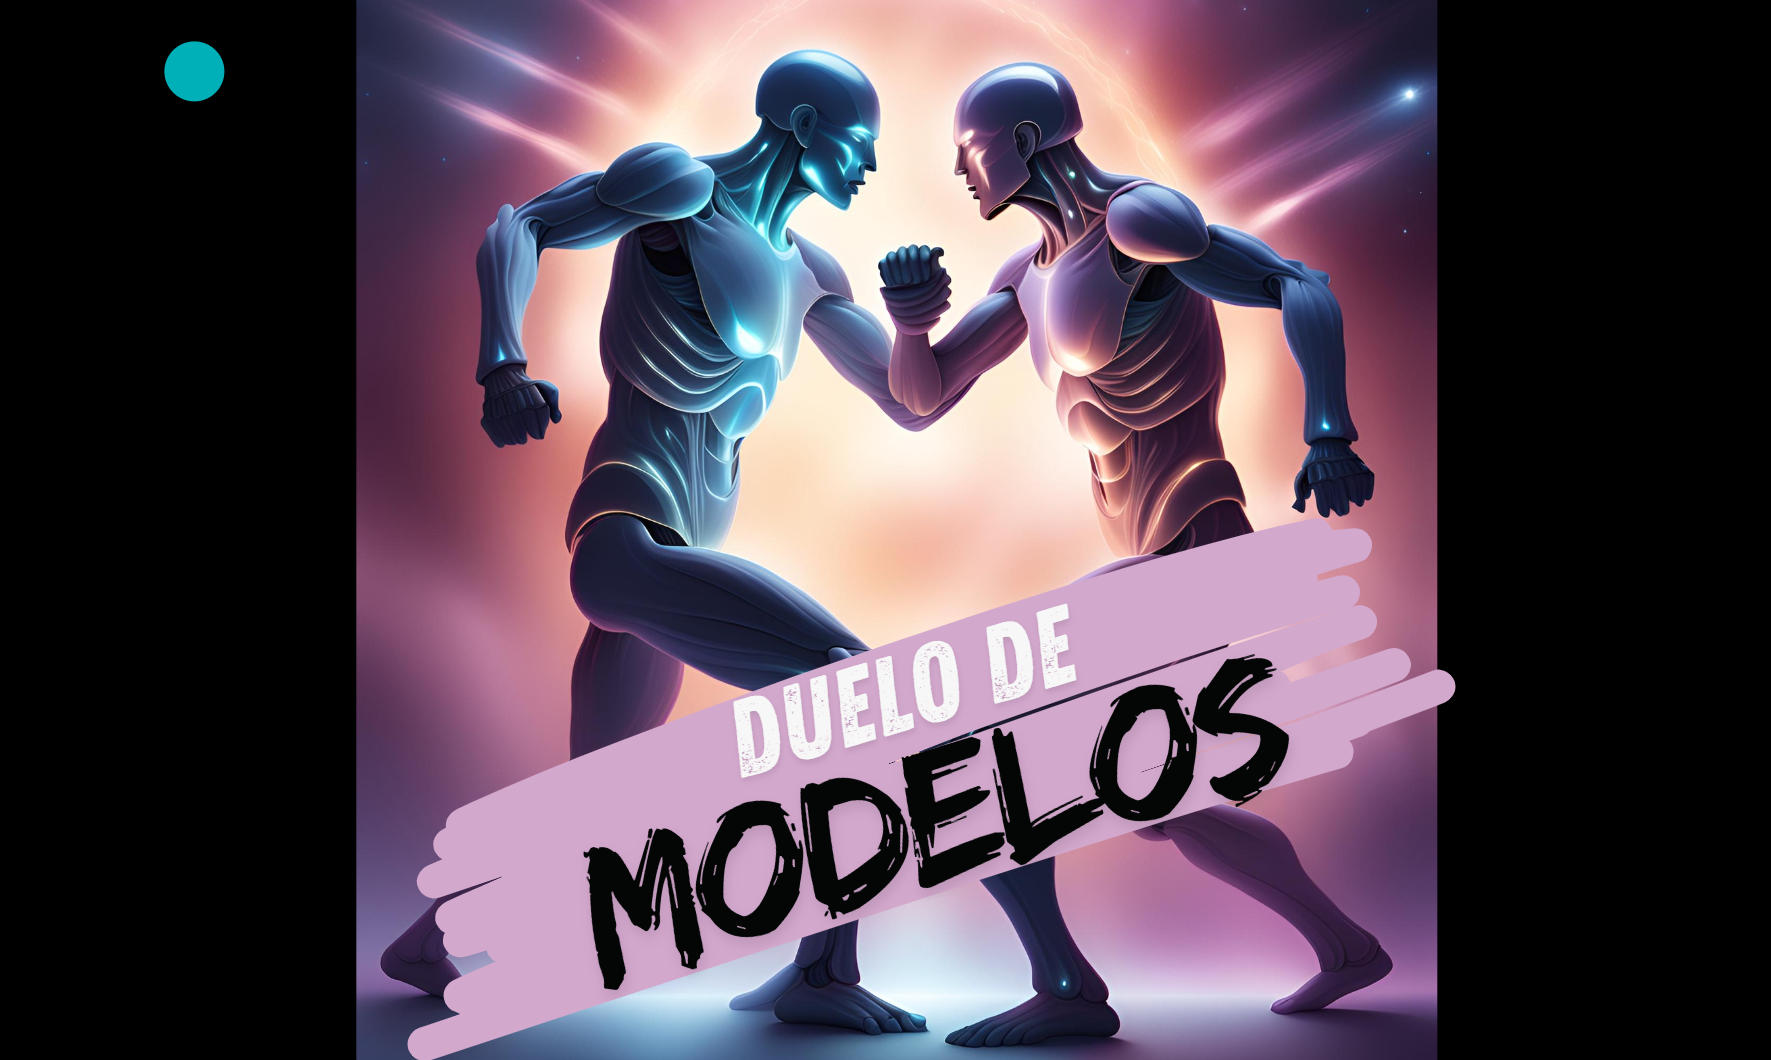

# Dinâmica da aula:

Durante esta aula, vamos explorar essa dinâmica, comparando um modelo de classificação que utiliza cross validation e outro que não utiliza.

Cross validation é uma técnica que nos permite avaliar o desempenho do modelo de maneira mais robusta, dividindo os dados em várias partes e testando o modelo repetidamente em diferentes subconjuntos. O objetivo é verificar se o modelo é consistente e generaliza bem para dados não vistos.

Ao final, vamos analisar os resultados para entender os principais fatores que podem ter impactado o desempenho do modelo vencedor. É importante lembrar que o fato de um modelo se sair melhor que o outro nessa análise não significa que ele é sempre superior, mas sim que, para esses dados específicos e nesse contexto, ele apresentou melhor performance. Além disso, o uso de cross validation pode ser mais vantajoso em certos cenários, mas pode aumentar o tempo de processamento.

# Conhecendo nossos campeões:

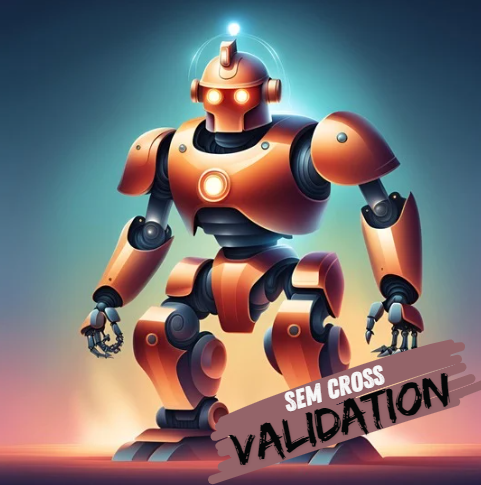

Apresento a vocês: o modelo de classificação tradicional! Bem conhecido por todos, esse modelo é treinado de forma direta, utilizando uma única divisão entre os dados de treino e teste. Simples e eficiente, ele segue a lógica tradicional de aprendizado, onde o conjunto de treino é usado para construir o modelo e o conjunto de teste para avaliar sua performance. Embora não utilize técnicas mais avançadas como o cross validation, esse método direto é rápido e fácil de implementar, permitindo uma avaliação imediata do desempenho. Ideal para situações onde a simplicidade e velocidade são cruciais, este modelo continua sendo uma escolha sólida para muitos cenários.

**Vantagem:**
A simplicidade e rapidez de implementação são as maiores vantagens desse modelo. Ele permite uma avaliação rápida e direta do desempenho, o que é ideal para situações em que o tempo é um fator crítico ou quando se precisa de uma solução inicial para ter uma ideia do comportamento dos dados.

**Desvantagem:**
A principal desvantagem é o risco de não capturar totalmente a variabilidade dos dados, o que pode levar a resultados menos robustos. Como o modelo é treinado e testado em apenas uma divisão dos dados, ele pode estar mais sujeito a overfitting ou underfitting, especialmente se essa divisão específica não for representativa do conjunto total.

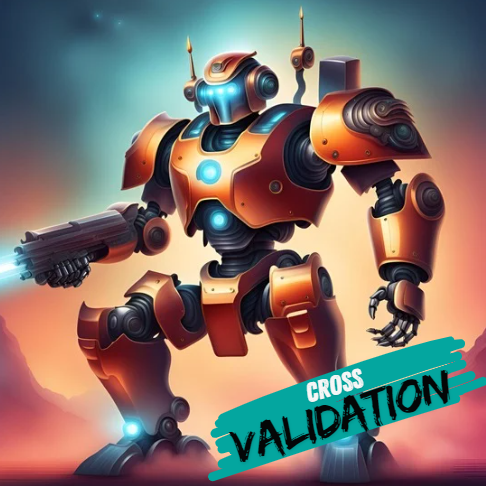

Apresento a vocês: o modelo com Cross Validation! Este modelo é construído utilizando uma técnica poderosa que divide os dados em várias partes, treinando e testando o modelo em diferentes subconjuntos. Com essa abordagem, garantimos que o modelo seja avaliado de forma mais robusta e representativa, proporcionando uma visão mais confiável de seu desempenho geral. O Cross Validation é especialmente valioso para evitar surpresas desagradáveis, como overfitting, ao assegurar que o modelo generalize bem para dados não vistos.

**Vantagem:**
A maior vantagem do Cross Validation é sua capacidade de fornecer uma avaliação mais precisa e robusta do modelo. Ao testar o modelo em diferentes subconjuntos dos dados, ele minimiza o risco de overfitting e garante que o desempenho reportado seja mais representativo do comportamento real do modelo.

**Desvantagem:**
A principal desvantagem é o aumento significativo do tempo de processamento. Como o modelo é treinado e testado várias vezes em diferentes divisões dos dados, isso pode exigir mais recursos computacionais e tempo, o que pode ser um desafio em projetos com prazos curtos ou grandes volumes de dados.

# Arena do duelo (Nossa base de dados):

Para esse duelo, vamos utilizar uma base de dados que aborda um tema crucial: a redução da mortalidade infantil e materna, um dos Objetivos de Desenvolvimento Sustentável das Nações Unidas. A base contém 2126 registros extraídos de exames de Cardiotocograma (CTG), que são essenciais para avaliar a saúde fetal. Esses exames foram classificados em três categorias: Normal, Suspeito e Patológico.

A dinâmica do duelo envolverá a comparação entre um modelo com e sem cross validation, usando essa base para prever as classes dos CTGs. Vamos analisar como cada abordagem lida com os dados e qual delas apresenta melhores resultados na classificação dos exames, com o objetivo de contribuir para a prevenção de mortes infantis e maternas.

Após a coleta dessas características, três obstetras especialistas analisaram os dados e classificaram cada exame em uma das três classes:

Normal: Indica que o exame não apresentou anormalidades e que o feto está saudável.

Suspect (Suspeito): Indica que o exame mostrou sinais que podem necessitar de monitoramento adicional ou intervenção, mas não é uma situação crítica.

Pathological (Patológico): Indica que o exame revelou problemas sérios que podem exigir ação imediata para prevenir riscos à saúde do feto e da mãe.

In [ ]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para os modelos de machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
base = pd.read_csv('fetal_health.csv')

In [ ]:
base.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
base.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [ ]:
base.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# Como estamos lidando com uma base nova e de dados muito interessantes vamos realizar uma análise exploratória nos nossos dados.

In [ ]:
distribuicao = base['fetal_health'].value_counts()
print(distribuicao)

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


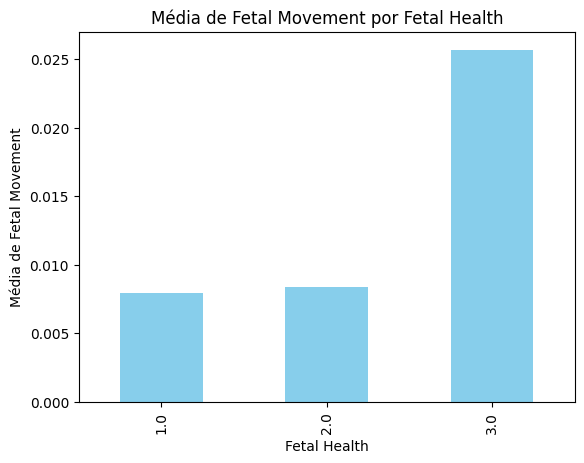

In [ ]:
# média de fetal_movement para cada classe de fetal_health
mean_fetal_movement = base.groupby('fetal_health')['fetal_movement'].mean()

mean_fetal_movement.plot(kind='bar', color='skyblue')
plt.title('Média de Fetal Movement por Fetal Health')
plt.xlabel('Fetal Health')
plt.ylabel('Média de Fetal Movement')
plt.show()

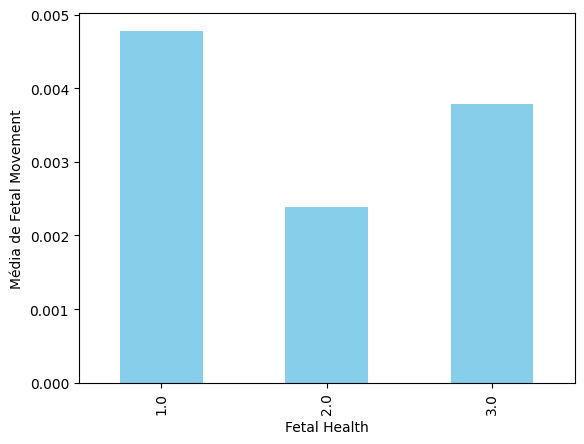

In [ ]:
# média de uterine_contractions para cada classe de fetal_health
mean_fetal_movement = base.groupby('fetal_health')['uterine_contractions'].mean()

mean_fetal_movement.plot(kind='bar', color='skyblue')
plt.xlabel('Fetal Health')
plt.ylabel('Média de Fetal Movement')
plt.show()

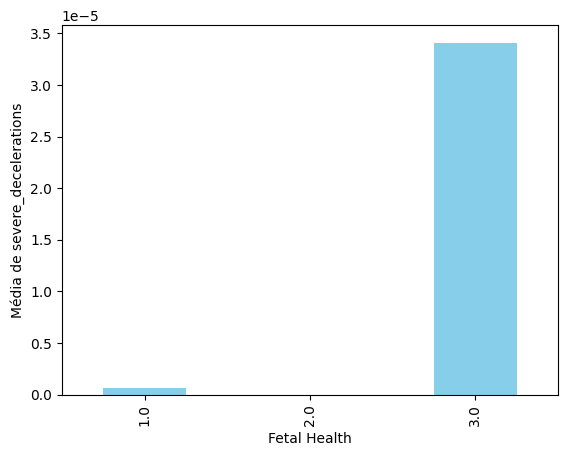

In [ ]:
# média de severe_decelerations para cada classe de fetal_health
mean_fetal_movement = base.groupby('fetal_health')['severe_decelerations'].mean()

mean_fetal_movement.plot(kind='bar', color='skyblue')
plt.xlabel('Fetal Health')
plt.ylabel('Média de severe_decelerations')
plt.show()

<Axes: >

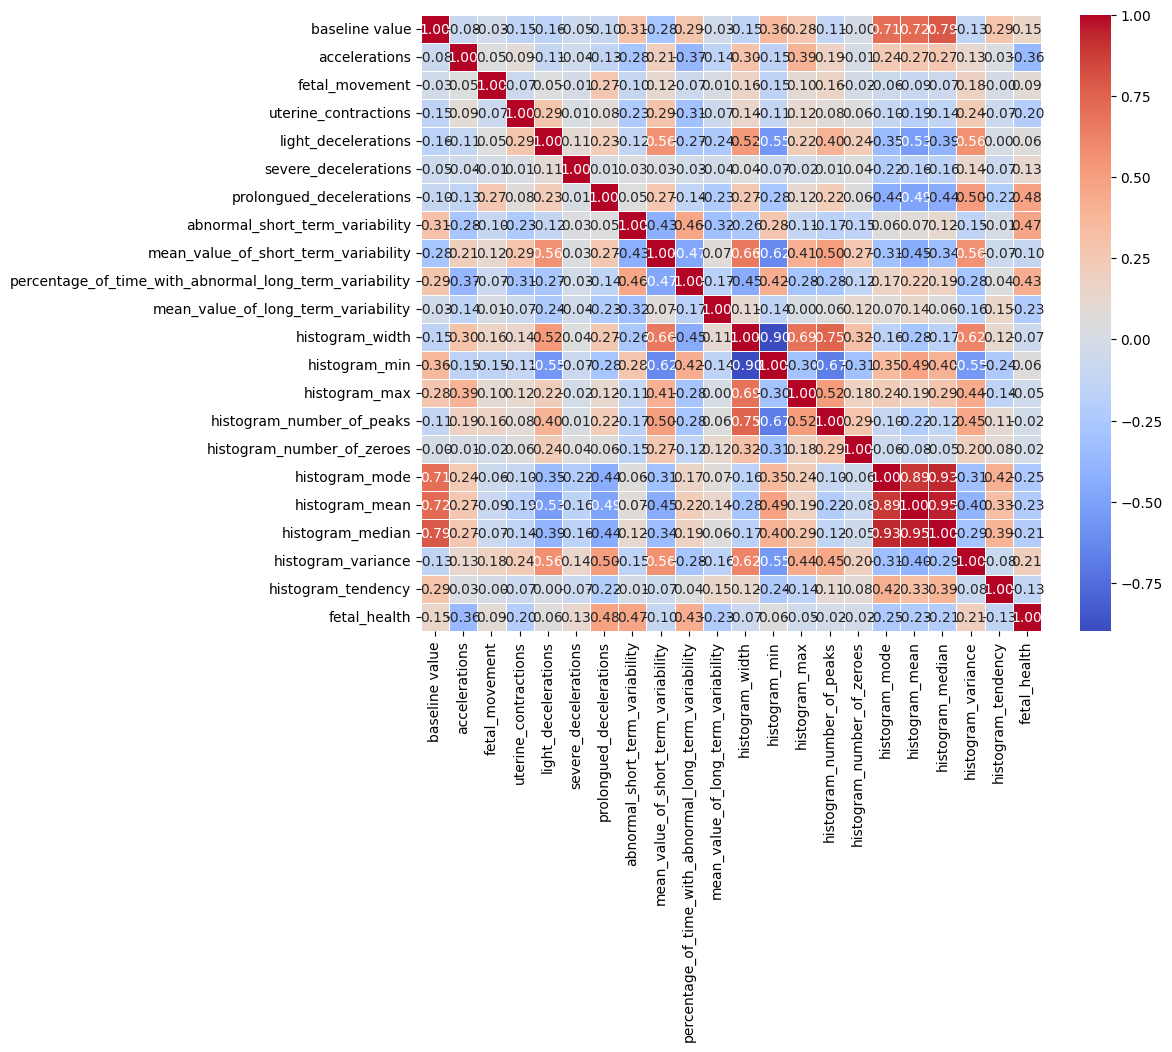

In [ ]:
correlation_matrix = base.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

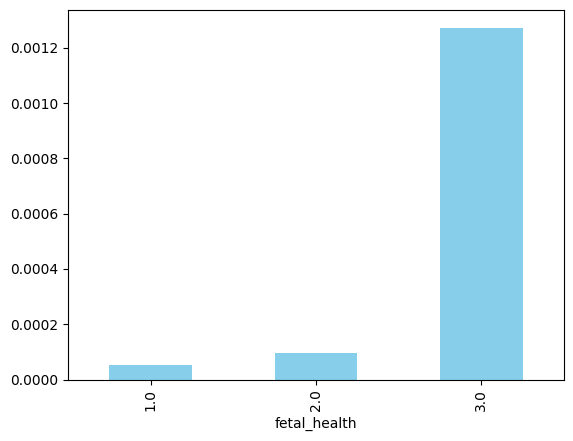

In [ ]:
mean_fetal_movement = base.groupby('fetal_health')['prolongued_decelerations'].mean()

mean_fetal_movement.plot(kind='bar', color='skyblue')
plt.show()

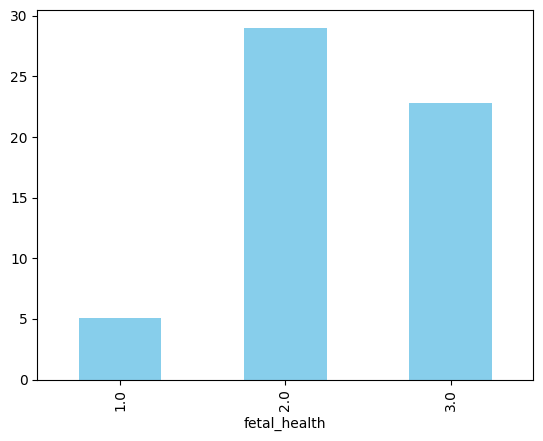

In [ ]:
mean_fetal_movement = base.groupby('fetal_health')['percentage_of_time_with_abnormal_long_term_variability'].mean()

mean_fetal_movement.plot(kind='bar', color='skyblue')
plt.show()

# Duelo 1: Dados sem Pré Processamento.

Sem Cross validation:

In [ ]:
X = base.drop(columns='fetal_health')
Y = base['fetal_health']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
duelo1_scv = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
duelo1_scv.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
Y_pred = duelo1_scv.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(report)

Acurácia: 0.95
Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.89      0.77      0.82        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.90       426
weighted avg       0.94      0.95      0.94       426



Com Cross Validation

In [ ]:
duelo1_cv = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
cv_scores = cross_val_score(duelo1_cv, X, Y, cv=5)  # cv=5 define 5-fold cross-validation

In [ ]:
print(f"Scores de Cross-Validation: {cv_scores}")
print(f"Acurácia Média: {np.mean(cv_scores):.2f}")
print(f"Desvio Padrão: {np.std(cv_scores):.2f}")

Scores de Cross-Validation: [0.87558685 0.90352941 0.92       0.87058824 0.75058824]
Acurácia Média: 0.86
Desvio Padrão: 0.06


Sem Cross-Validation: O modelo mostra uma acurácia muito alta de 95% com uma boa performance geral, especialmente na classe 1.0, que tem a maior precisão e recall.

Com Cross-Validation: A acurácia média é de 86% com um desvio padrão de 0.06, indicando que o desempenho do modelo varia mais entre diferentes divisões dos dados. Isso é esperado e geralmente mais confiável, pois dá uma ideia de como o modelo generaliza para dados não vistos.

O principal objetivo da cross-validation não é simplesmente encontrar o modelo com a melhor acurácia possível em um único conjunto de dados, mas sim obter uma visão mais robusta e realista de como o modelo vai performar em novos dados. Isso é feito dividindo os dados em múltiplos subconjuntos e treinando o modelo em diferentes combinações desses subconjuntos.

Um modelo que tem uma acurácia alta em um único conjunto de dados pode parecer excelente, mas pode não ser tão eficiente quando aplicado a novos dados, especialmente se houver variação significativa entre os conjuntos de dados. A cross-validation ajuda a identificar modelos que não apenas têm uma boa performance em um conjunto específico, mas que também são robustos e generalizáveis para diferentes subconjuntos dos dados.

# Duelo 2: Com melhora de hyperparametros.

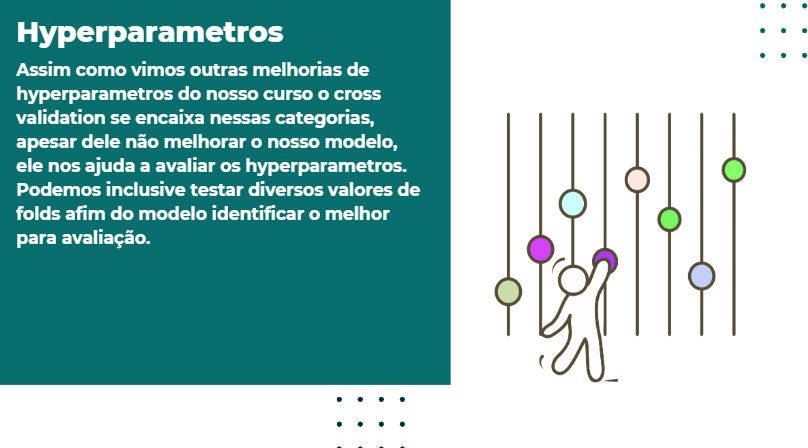

Modelo sem Cross Validation:

In [ ]:
# Começamos definindo nossos hyperparametros
best_params = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10)
}

O randint é uma função da biblioteca scipy.stats (ou numpy.random em outros contextos) que gera números inteiros aleatórios dentro de um intervalo especificado. Quando usado em técnicas de busca de hiperparâmetros, como no RandomizedSearchCV, ele permite que o processo de busca escolha aleatoriamente um valor de hiperparâmetro dentro desse intervalo durante a validação cruzada.

In [ ]:
# Em seguida criamos nosso modelo
duelo2_cv = RandomForestClassifier(random_state=42)

In [ ]:
# Configuramoa o modelo com os melhores parâmetros
random_search = RandomizedSearchCV(
    estimator=duelo2_cv,
    param_distributions=best_params,
    n_iter=100,  # Número de iterações da busca
    random_state=42,
    n_jobs=-1  # Usar todos os núcleos disponíveis
)

In [ ]:
#treinamos nosso modelo com os melhores parametros
random_search.fit(X_train, Y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FFC0F33A10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FFC100F110>},
                   random_state=42)

In [ ]:
best_params_encontrados = random_search.best_params_
print("Melhores Parâmetros Encontrados:", best_params_encontrados)

Melhores Parâmetros Encontrados: {'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 121}


In [ ]:
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

report = classification_report(Y_test, y_pred)
print("Relatório de Classificação:")
print(report)

Acurácia: 0.95
Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.86      0.80      0.83        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.91      0.90      0.90       426
weighted avg       0.94      0.95      0.95       426



Modelo com Cross Validation:

In [ ]:
best_params = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10)
}

In [ ]:
random_search_cv = RandomizedSearchCV(
    estimator=duelo2_cv,
    param_distributions=best_params,
    n_iter=100,  # Número de iterações da busca
    cv=5,  # Número de folds da validação cruzada
    random_state=42,
    n_jobs=-1
)

cv=5: Isso significa que a validação cruzada é feita com 5 folds (ou partições). O conjunto de dados de treinamento é dividido em 5 partes. Em cada iteração, 4 partes são usadas para treinar o modelo, e a parte restante é usada para validação. Esse processo é repetido 5 vezes, com cada parte sendo usada uma vez como conjunto de validação.

In [ ]:
random_search_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FFC103E450>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FFC103C350>},
                   random_state=42)

In [ ]:
melhor_pontuacao = random_search_cv.best_score_
print(f"Melhor Pontuação durante a CV: {melhor_pontuacao:.2f}")

Melhor Pontuação durante a CV: 0.94


In [ ]:
best_params_cv = random_search_cv.best_params_
print("Melhores Parâmetros Encontrados:", best_params_cv)

Melhores Parâmetros Encontrados: {'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 121}


In [ ]:
y_pred_cv = random_search_cv.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred_cv)
print(f"Acurácia: {accuracy:.2f}")

report = classification_report(Y_test, y_pred_cv)
print("Relatório de Classificação:")
print(report)

Acurácia: 0.95
Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.86      0.80      0.83        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.91      0.90      0.90       426
weighted avg       0.94      0.95      0.95       426



Ele usa X_train e Y_train para realizar a busca. Dentro de RandomizedSearchCV, o conjunto de dados é dividido em folds para validação cruzada, mas a busca de hiperparâmetros é feita com base nesses dados de treino.

Durante a Busca: Em cada iteração da busca, RandomizedSearchCV treina o modelo com diferentes combinações de hiperparâmetros usando os dados de treino fornecidos (X_train e Y_train).
Após a Busca: Após encontrar a melhor combinação de hiperparâmetros, o modelo final é treinado com todo o conjunto de dados de treino (X_train e Y_train) para garantir que o modelo é ajustado da melhor forma possível antes de ser avaliado em um conjunto de teste separado.